In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [3]:
def bgr2rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [26]:
img = cv2.imread("imgs/image_369.png")

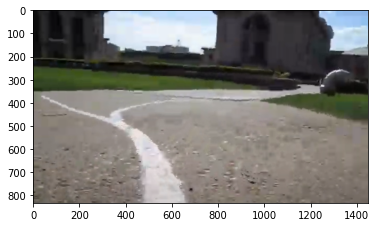

In [12]:
plt.imshow(bgr2rgb(img))
plt.show()

In [16]:
H,W,_ = img.shape
H,W

(833, 1448)

In [34]:
pts = [(H-1,0),(400,200),(400,1200),(H-1,W-1)]
for r,c in pts:
    cv2.circle(img, (c,r), radius=10, color=(0,255,0), thickness=-1)

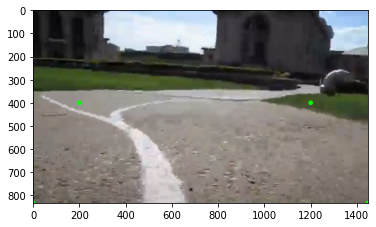

In [29]:
plt.imshow(bgr2rgb(img))
plt.show()

In [36]:
img_name = "imgs/image_358.png"
img = bgr2rgb(cv2.imread(img_name))
H,W,_ = img.shape

In [37]:
resize = H/360
src = [(351,220), (500,359), (0,359), (186,220)] 
src = [(int(resize*x),int(resize*y)) for x,y in src]
dst = [(10, 34), (10, 6.5), (-10, 6.5), (-10, 34)] # inches
dst = [(10*(x + 30), 10*y) for (x,y) in dst]
dst_np = np.array(dst, dtype=np.float32)
src_np = np.array(src, dtype=np.float32)
resize,src_np, dst_np

(1.7833333333333334,
 array([[625., 392.],
        [891., 640.],
        [  0., 640.],
        [331., 392.]], dtype=float32),
 array([[400., 340.],
        [400.,  65.],
        [200.,  65.],
        [200., 340.]], dtype=float32))

In [38]:
W

949

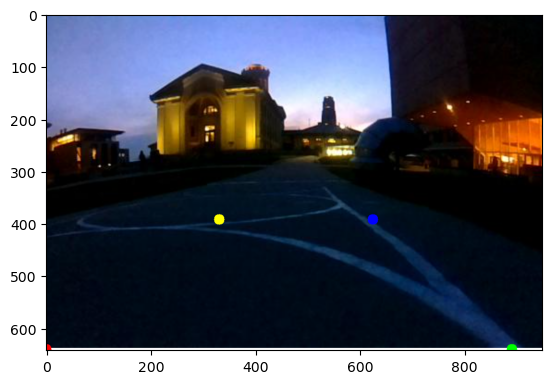

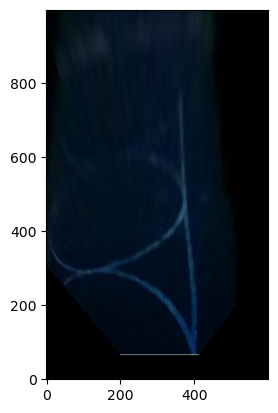

In [39]:


SCALE = 1000
colors = [
    (0, 0, 255),  # red
    (0, 255, 0),  # green
    (255, 0, 0),  # blue
    (255, 255, 0),  # cyan
]
for cnr_idx, (x, y) in enumerate(src):
    cv2.circle(img, (x, y), 10, colors[cnr_idx], -1)
plt.imshow(img)
plt.show()

img = bgr2rgb(cv2.imread(img_name))

M = cv2.getPerspectiveTransform(src_np, dst_np)
h, w = img.shape[:2]
warped = cv2.warpPerspective(img, M, (600, 1000), flags=cv2.INTER_LINEAR)
plt.imshow(warped, origin='lower')
plt.show()

In [1]:
from time import sleep
from picamera import PiCamera

camera = PiCamera()
camera.resolution = [1024, 768]
camera.start_preview()

sleep(2)

camera.capture('foo.jpg')
camera.close()

In [4]:
# Checkboard dimensions
CHECKERBOARD = (6,9)
subpix_criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.1)
calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC + cv2.fisheye.CALIB_CHECK_COND + cv2.fisheye.CALIB_FIX_SKEW
objp = np.zeros((1, CHECKERBOARD[0]*CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)

objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

### read images and for each image:
img = cv2.imread('foo.jpg')
img_shape = img.shape[:2]

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Find the chess board corners
ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH+cv2.CALIB_CB_FAST_CHECK+cv2.CALIB_CB_NORMALIZE_IMAGE)
# If found, add object points, image points (after refining them)
if ret == True:
    objpoints.append(objp)
    cv2.cornerSubPix(gray,corners,(3,3),(-1,-1),subpix_criteria)
    imgpoints.append(corners)
###

# calculate K & D
N_imm = 1 # number of calibration images
K = np.zeros((3, 3))
D = np.zeros((4, 1))
rvecs = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_imm)]
tvecs = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_imm)]
retval, K, D, rvecs, tvecs = cv2.fisheye.calibrate(
    objpoints,
    imgpoints,
    gray.shape[::-1],
    K,
    D,
    rvecs,
    tvecs,
    calibration_flags,
    (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 30, 1e-6))

error: OpenCV(4.5.5) /tmp/pip-wheel-efxaz4j7/opencv-python_bedc0fac27944da0921e079da44d32bf/opencv/modules/calib3d/src/fisheye.cpp:741: error: (-215:Assertion failed) !objectPoints.empty() && !imagePoints.empty() && objectPoints.total() == imagePoints.total() in function 'calibrate'
